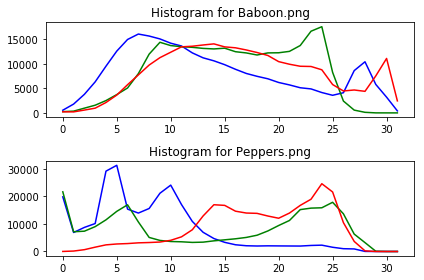

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Abre o arquivo de imagem, e armazena-o em um numpy array.
peppers = cv2.imread('peppers.png')
baboon = cv2.imread('baboon.png')
bin_size = 32
color = ('b','g','r')
for i,col in enumerate(color):
    histr_bb = cv2.calcHist([baboon],[i],None,[bin_size],[0,256])
    histr_pp = cv2.calcHist([peppers],[i],None,[bin_size],[0,256])
    ax = plt.subplot(211) 
    ax.plot(histr_bb,color = col)
    ax.set_title('Histogram for Baboon.png')
    bx = plt.subplot(212)
    bx.plot(histr_pp,color = col)
    bx.set_title('Histogram for Peppers.png')
plt.tight_layout()
plt.show()

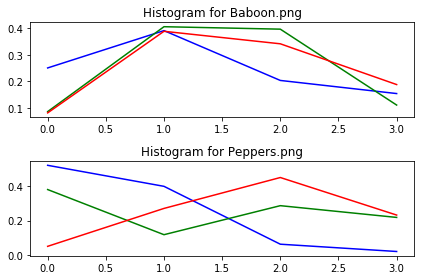

Euclidean distance between the histograms using bin_size  4 : 0.3115178048610687


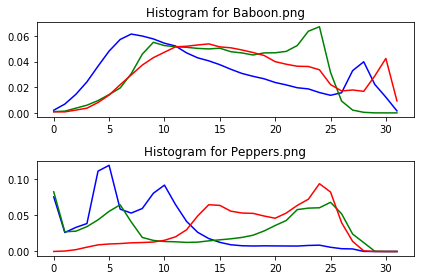

Euclidean distance between the histograms using bin_size  32 : 0.15768581132094064


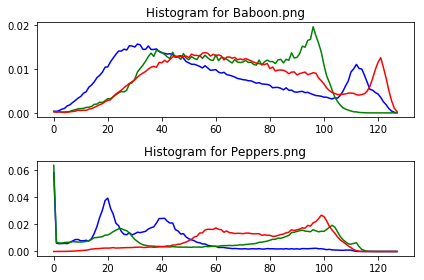

Euclidean distance between the histograms using bin_size  128 : 0.08879704773426056


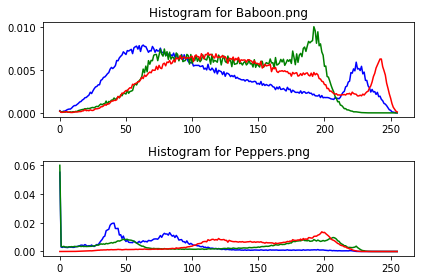

Euclidean distance between the histograms using bin_size  256 : 0.06943420320749283


In [2]:
from scipy.spatial.distance import euclidean

bin_size = [4, 32, 128, 256]

for bin in bin_size:
    color = ('b','g','r')
    euclidean_dist = 0.0
    for i,col in enumerate(color):
        histr_bb = cv2.calcHist([baboon],[i],None,[bin],[0,256])
        histr_bb = cv2.normalize(histr_bb, histr_bb, norm_type=cv2.NORM_L1)
        histr_pp = cv2.calcHist([peppers],[i],None,[bin],[0,256])
        histr_pp = cv2.normalize(histr_pp, histr_pp, norm_type=cv2.NORM_L1)
        euclidean_dist += euclidean(histr_bb, histr_pp)
        ax = plt.subplot(211) 
        ax.plot(histr_bb,color = col)
        ax.set_title('Histogram for Baboon.png')
        bx = plt.subplot(212)
        bx.plot(histr_pp,color = col)
        bx.set_title('Histogram for Peppers.png')
    plt.tight_layout()
    plt.show()
    euclidean_dist /= len(color)
    print("Euclidean distance between the histograms using bin_size ", bin, ":", euclidean_dist)

In [3]:
peppers_gray = cv2.cvtColor(peppers, cv2.COLOR_RGB2GRAY )
peppers_binary = np.zeros(peppers_gray.shape)
peppers_1 = np.zeros(peppers_gray.shape)
peppers_2 = np.zeros(peppers_gray.shape)
peppers_3 = np.zeros(peppers_gray.shape)
peppers_4 = np.zeros(peppers_gray.shape)
peppers_5 = np.zeros(peppers_gray.shape)
peppers_6 = np.zeros(peppers_gray.shape)
peppers_7 = np.zeros(peppers_gray.shape)
peppers_8 = np.zeros(peppers_gray.shape)

for i in range(peppers.shape[0]):
    for j in range(peppers.shape[1]):
        tmp_str= np.binary_repr(peppers_gray[i, j], width=8)
        peppers_1[i, j] = int(tmp_str[7])
        peppers_2[i, j] = int(tmp_str[6])
        peppers_3[i, j] = int(tmp_str[5])
        peppers_4[i, j] = int(tmp_str[4])
        peppers_5[i, j] = int(tmp_str[3])
        peppers_6[i, j] = int(tmp_str[2])
        peppers_7[i, j] = int(tmp_str[1])
        peppers_8[i, j] = int(tmp_str[0])


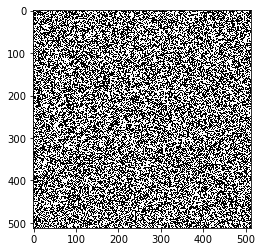

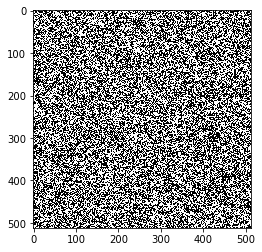

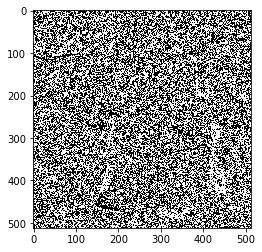

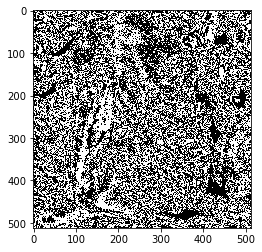

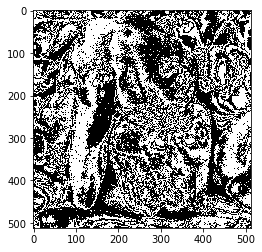

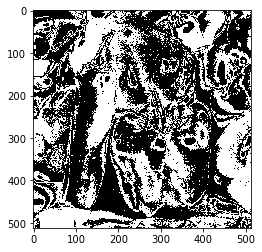

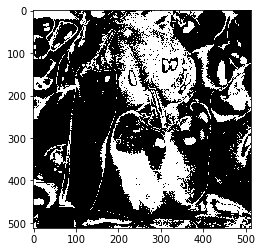

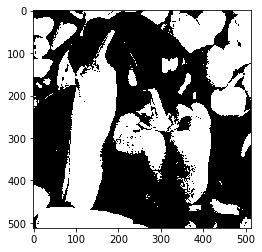

In [4]:
images = [peppers_1, peppers_2, peppers_3, peppers_4, peppers_5, peppers_6, peppers_7, peppers_8]
for image in images:   
    plt.imshow(image, cmap='gray')
    plt.show()

In [29]:
p_i = []
for image in images:
    p_i.append(np.sum(image)/(image.shape[0]*image.shape[1]))
p_i = np.array(p_i)
entropy = -(p_i*np.log2(p_i) + (1 - p_i)*np.log2(1 - p_i))

In [30]:
entropy

array([ 0.99999988,  0.99998967,  0.99991245,  0.99938785,  0.99663705,
        0.99224168,  0.90164323,  0.98660867])